**phase 1 & phase 2 with sklearn classes**

**Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

X_train = train_data.iloc[:, 1:3].values
y_train = train_data.iloc[:, 3].values
X_test = test_data.iloc[:, 1:3].values
y_test = test_data.iloc[:, 3].values

def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.75, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
    

def evaluate_model_manual(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metrics = {
        "Train Accuracy": accuracy_score(y_train, y_train_pred),
        "Test Accuracy": accuracy_score(y_test, y_test_pred),
        "Train Precision": precision_score(y_train, y_train_pred, average="binary"),
        "Test Precision": precision_score(y_test, y_test_pred, average="binary"),
        "Train Recall": recall_score(y_train, y_train_pred, average="binary"),
        "Test Recall": recall_score(y_test, y_test_pred, average="binary"),
        "Train F1 Score": f1_score(y_train, y_train_pred, average="binary"),
        "Test F1 Score": f1_score(y_test, y_test_pred, average="binary"),
    }
    return metrics

**phase 1**

Best Parameters: {'estimator__max_depth': 10, 'estimator__min_samples_leaf': 10, 'estimator__min_samples_split': 10, 'n_estimators': 100}
Evaluation Metrics:
------------------------------
Train Accuracy      : 0.8906
Test Accuracy       : 0.8725
Train Precision     : 0.8783
Test Precision      : 0.8560
Train Recall        : 0.9071
Test Recall         : 0.8941
Train F1 Score      : 0.8925
Test F1 Score       : 0.8747
------------------------------




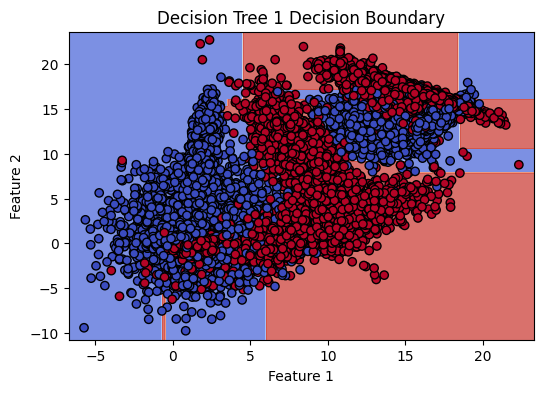

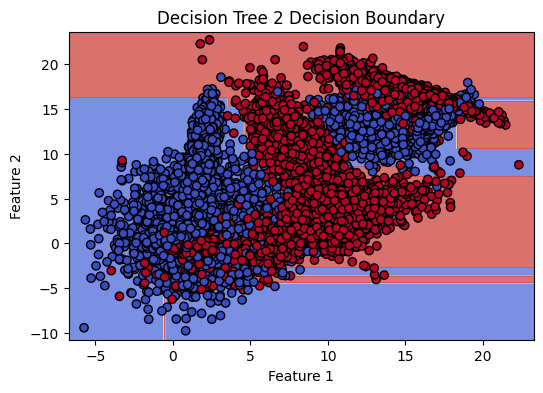

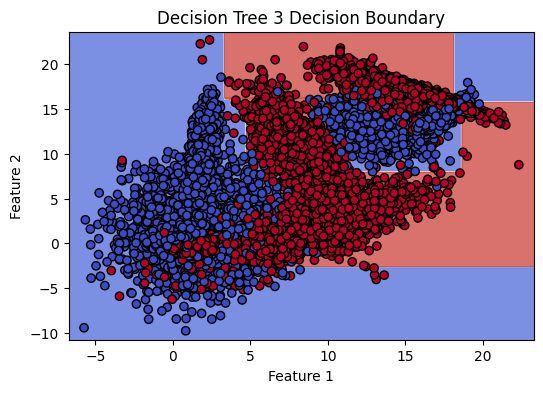

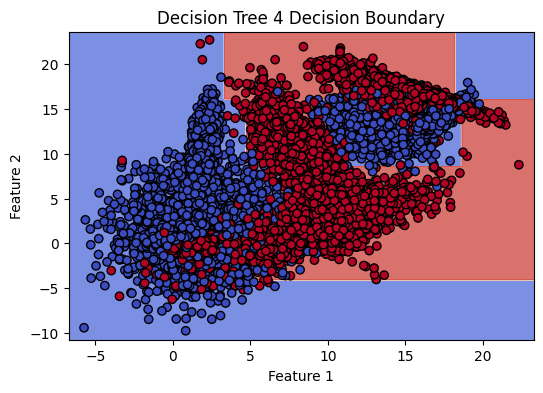

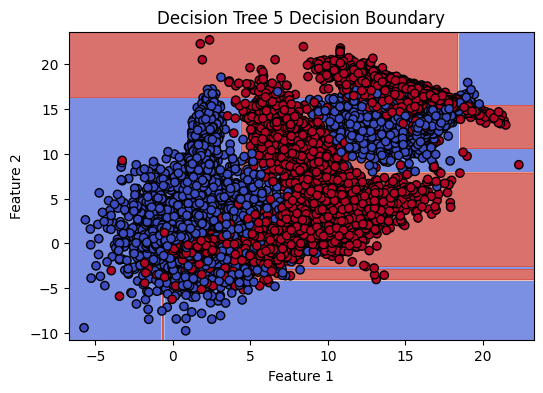

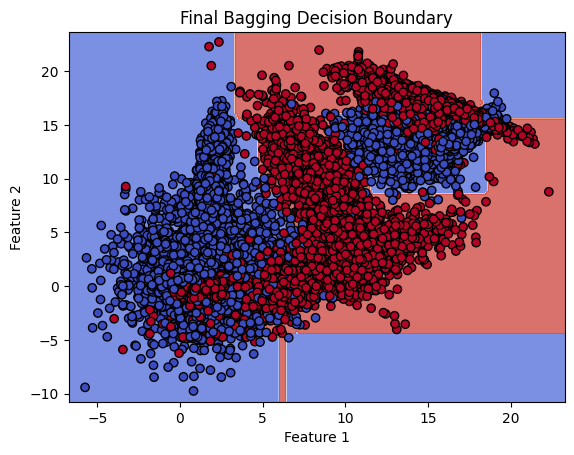

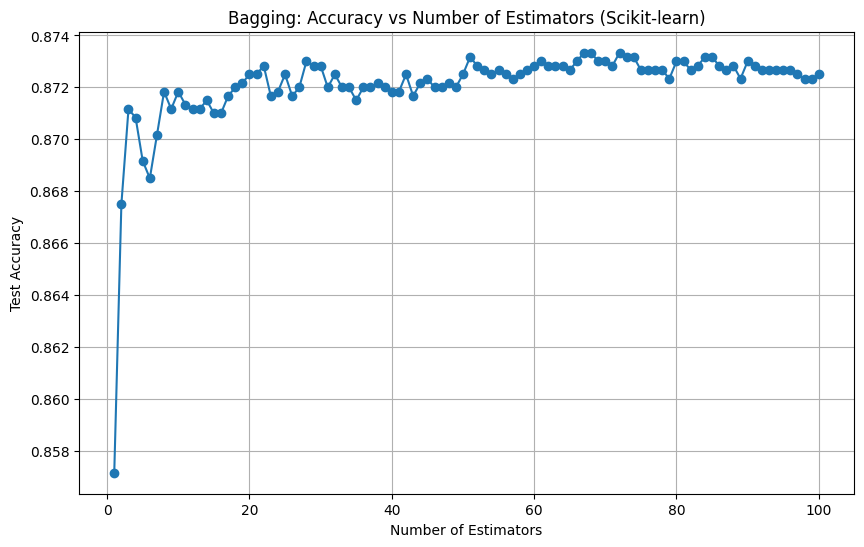

In [23]:
# Define parameter grid
param_grid = {
    'estimator__max_depth': [5, 10, 15],
    'estimator__min_samples_split': [10, 15, 20],
    'estimator__min_samples_leaf': [10, 15, 20],
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

# Initialize BaggingClassifier with a DecisionTree base estimator
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    random_state=42
)

# Perform grid search
grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train Final Model with Tuned Parameters
final_bagging_model = BaggingClassifier(
        estimator=DecisionTreeClassifier(
        max_depth=best_params['estimator__max_depth'],
        min_samples_split=best_params['estimator__min_samples_split'],
        min_samples_leaf=best_params['estimator__min_samples_leaf'],
        random_state=42
    ),
    n_estimators=best_params['n_estimators'],
    random_state=42
)

final_bagging_model.fit(X_train, y_train)

# Evaluate Final Model
metrics = evaluate_model_manual(final_bagging_model, X_train, y_train, X_test, y_test)

print("Evaluation Metrics:")
print("-" * 30)
for metric, value in metrics.items():
    print(f"{metric:<20}: {value:.4f}")
print("-" * 30)
print("\n")

# Visualize individual decision boundaries
n_visualize = 5
for i in range(min(n_visualize, len(final_bagging_model.estimators_))):
    plt.figure(figsize=(6, 4))
    plot_decision_boundary(final_bagging_model.estimators_[i], X_train, y_train, 
                           title=f"Decision Tree {i+1} Decision Boundary")
    plt.show()
# Plot final Bagging decision boundary
plot_decision_boundary(final_bagging_model, X_train, y_train, title="Final Bagging Decision Boundary")

# Plot Accuracy vs Number of Estimators
test_accuracies = []
for n_estimators in range(1, 101):
    temp_model = BaggingClassifier(
            estimator=DecisionTreeClassifier(
            max_depth=best_params['estimator__max_depth'],
            min_samples_split=best_params['estimator__min_samples_split'],
            min_samples_leaf=best_params['estimator__min_samples_leaf'],
            random_state=42
        ),
        n_estimators=n_estimators,
        random_state=42
    )
    temp_model.fit(X_train, y_train)
    test_accuracies.append(accuracy_score(y_test, temp_model.predict(X_test)))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), test_accuracies, marker='o')
plt.title("Bagging: Accuracy vs Number of Estimators (Scikit-learn)")
plt.xlabel("Number of Estimators")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()

**phase 2**

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'max_depth': 15, 'max_features': 1, 'min_samples_leaf': 15, 'min_samples_split': 10, 'n_estimators': 80}
Evaluation Metrics:
------------------------------
Train Accuracy      : 0.8935
Test Accuracy       : 0.8713
Train Precision     : 0.8808
Test Precision      : 0.8552
Train Recall        : 0.9105
Test Recall         : 0.8925
Train F1 Score      : 0.8954
Test F1 Score       : 0.8734
------------------------------


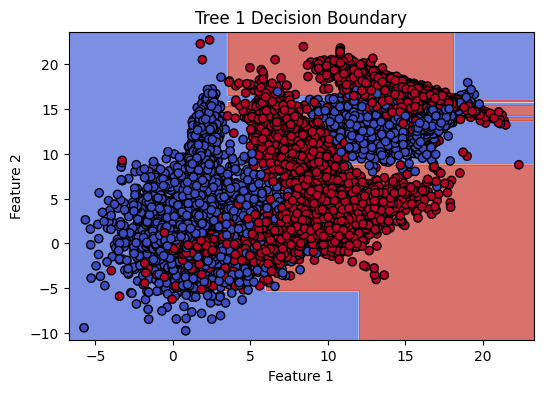

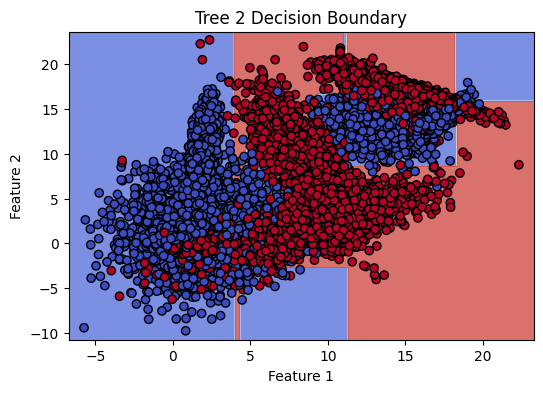

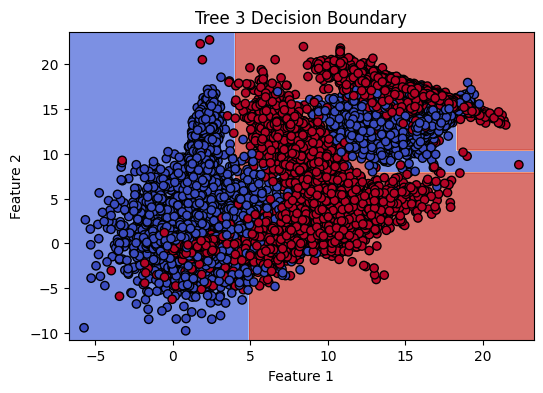

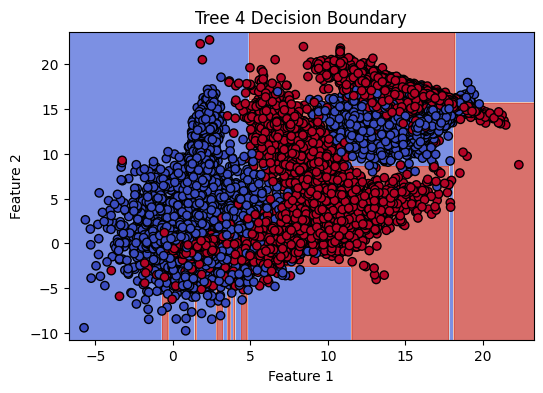

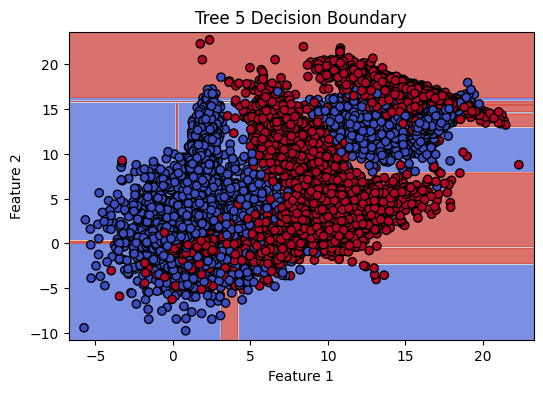

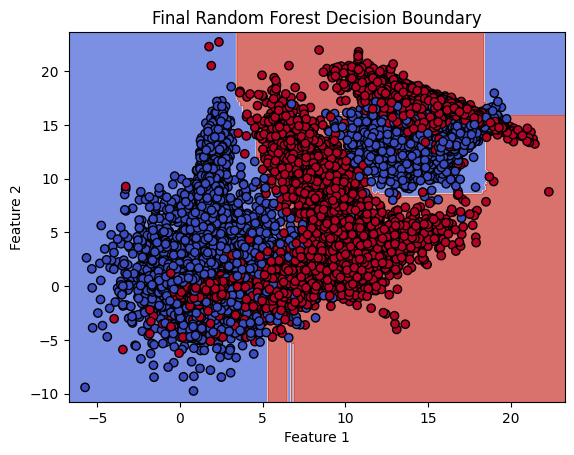

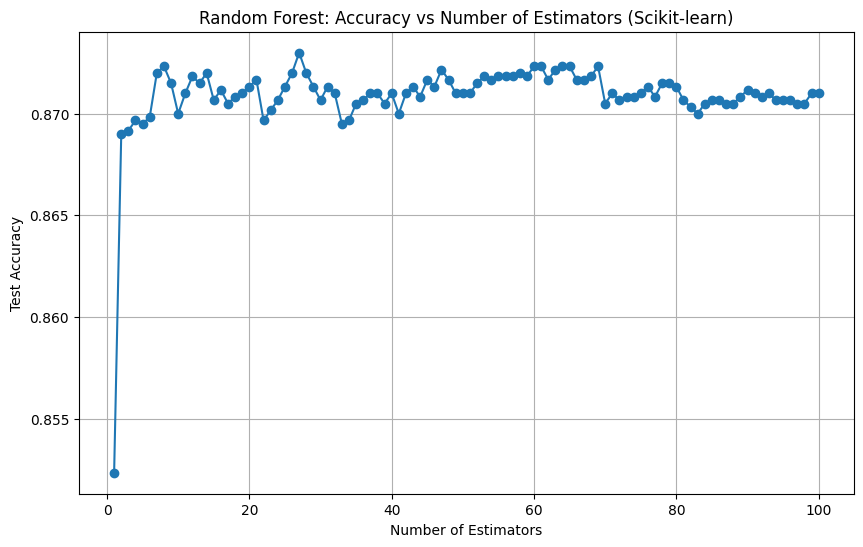

In [28]:
# Define parameter grid
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'max_features': [1, 2],
    'max_depth': [5, 10, 15],
    'min_samples_split':[10, 15, 20],
    'min_samples_leaf':[10, 15, 20]
}
# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train Final Model with Tuned Parameters
final_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

final_rf_model.fit(X_train, y_train)

# Evaluate Final Model
metrics = evaluate_model_manual(final_rf_model, X_train, y_train, X_test, y_test)

print("Evaluation Metrics:")
print("-" * 30)
for metric, value in metrics.items():
    print(f"{metric:<20}: {value:.4f}")
print("-" * 30)

# Visualize decision boundaries of individual trees
n_visualize = 5
for i in range(min(n_visualize, len(final_bagging_model.estimators_))):
    plt.figure(figsize=(6, 4))
    plot_decision_boundary(final_rf_model.estimators_[i], X_train, y_train, 
                           title=f"Tree {i+1} Decision Boundary")
    plt.show()
    
# Visualize final Random Forest decision boundary
plot_decision_boundary(final_rf_model, X_train, y_train, title="Final Random Forest Decision Boundary")

# Plot Accuracy vs Number of Estimators
test_accuracies = []
for n_estimators in range(1, 101):
    temp_rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_features=best_params['max_features'],
        max_depth=best_params['max_depth'],
        min_samples_split=best_params['min_samples_split'],
        min_samples_leaf=best_params['min_samples_leaf'],
        random_state=42
    )
    temp_rf.fit(X_train, y_train)
    test_accuracies.append(accuracy_score(y_test, temp_rf.predict(X_test)))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), test_accuracies, marker='o')
plt.title("Random Forest: Accuracy vs Number of Estimators (Scikit-learn)")
plt.xlabel("Number of Estimators")
plt.ylabel("Test Accuracy")
plt.grid(True)
plt.show()
